In [2]:
import pandas as pd

# Cargamos datos
import Loading_data 
from matplotlib import pyplot as plt    
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML

from Loading_data import Get_Comunidades_List as comunidades
COMUNIDADES = comunidades()


,Madrid,Cataluña,Castilla La Mancha,Castilla y León,País Vasco,C. Valenciana,Andalucía,Aragón,Galicia,Navarra,Extremadura,La Rioja,Asturias,Baleares,Cantabria,Canarias,Murcia,Ceuta y Melilla
Fecha,,,,,,,,,,,,,,,,,,
2020-05-02,70,76,36,18,9,13,15,12,2,2,7,1,6,4,1,4,0,0
2020-05-01,46,86,35,18,16,9,31,10,8,7,5,1,0,5,1,1,2,0
2020-04-30,71,70,27,16,22,18,19,3,0,3,6,2,7,3,0,1,0,0
2020-04-29,57,97,40,26,19,18,20,1,135,16,7,4,5,4,3,1,0,0
2020-04-28,62,109,31,20,14,11,11,9,7,0,5,6,8,2,2,2,2,0
2020-04-27,64,133,35,24,11,3,12,14,11,1,6,5,4,4,3,0,1,0
2020-04-26,74,68,38,27,18,14,14,3,6,2,6,4,10,1,1,1,1,0
2020-04-25,83,105,37,27,19,25,24,14,6,12,5,4,8,2,4,2,1,0
2020-04-24,81,50,67,30,26,23,28,14,7,8,4,4,8,4,5,7,1,0


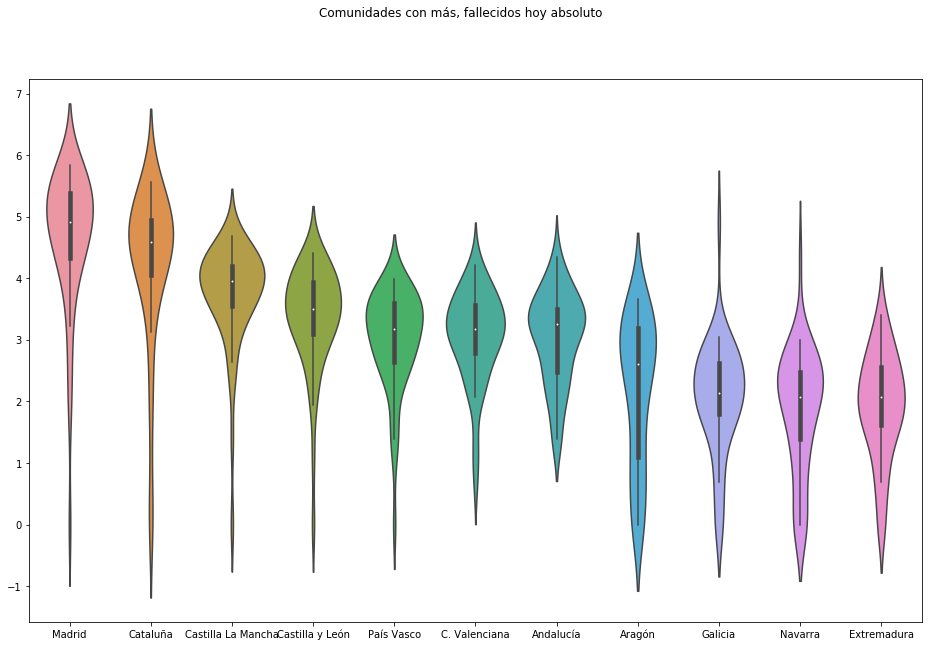

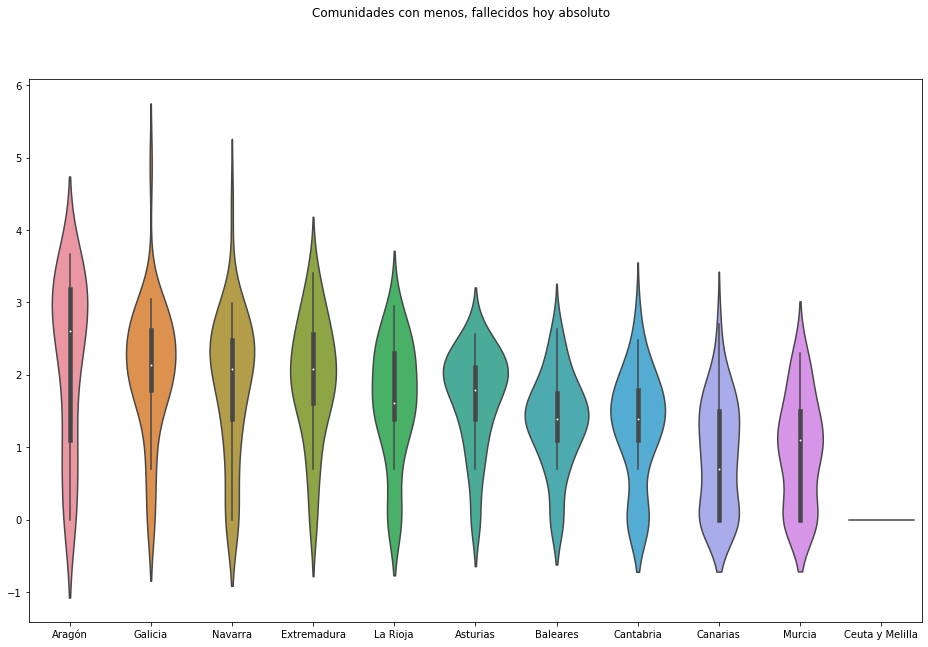

In [17]:
import numpy as np 
import seaborn as sns

def Get_Single_Dimension(dimension ):
    df = pd.DataFrame()
    df_tmp = pd.DataFrame()
    array = []
    #
    for ca in COMUNIDADES:
        df_tmp = Loading_data.Get_Comunidad(ca)
        new = df_tmp[[dimension]].copy()
        new.rename(columns={dimension: ca}, inplace=True)
        array.append(new)
    #
    df =  pd.concat(array, axis=1)
    return df

def plot_violin(dimension):
    """ Muestra la distribucion logaritmica por comunidades, de una dimension"""
    df = Get_Single_Dimension(dimension) 
    # Ordenamos comunidades 
    s = df.sum()
    df = df[s.sort_values(ascending=False).index[:]]

    # Pasamos a logaritmo
    df2 = np.log(df)
    df2.replace(-np.inf,  np.nan, inplace=True)
    display(HTML("<h2>Comparativa de distribucion de '" +dimension+ "', en cada CC.AA </h2>"))
    display(HTML("Distribuciones convertidas a logaritmos neperianos, para facilitar la comparación."))

    f, ax = plt.subplots()
    f.set_size_inches( 16, 10)

    f.suptitle("Comunidades con más, " + dimension.lower())

    sns.violinplot(data=df2.iloc[:,:-7])

    f, ax = plt.subplots()
    f.set_size_inches( 16, 10)
    f.suptitle("Comunidades con menos, " + dimension.lower()+".")
    sns.violinplot(data=df2.iloc[:,7:])
    return df

dimension = 'Fallecidos hoy absoluto'
df = plot_violin(dimension)
df


In [84]:
def Debug_Get_Single_Dimension():
    dimension = 'Fallecidos hoy absoluto'
    df = Get_Single_Dimension(dimension)
    return df
#    Debug_Get_Single_Dimension()

In [13]:
display(HTML("<h2>Comparativa de distribucion de " +dimension+ " en cada CC.AA </h2>"))
display(HTML("Distribuciones convertidas a logaritmos neperianos, para facilitar la comparación"))
